# Project 4 Report

## Team members: Bishal Sainju,Victor Lee,Supratik Chanda

## Introduction:
## This dataset consists of a nearly 3000 Amazon customer reviews (input text), star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots, Alexa Firesticks etc. for learning how to train Machine for sentiment analysis. We use this data to analyze Amazon’s Alexa product ; discover insights into consumer reviews and assist with machine learning models.We  also train your machine models for sentiment analysis and analyze customer reviews how many positive reviews ? and how many negative reviews ?

## Methods:
#### 1) First of all we check whether there is any null value or not 

#### 2) Convert all the data types to float to avoid any typecasting error

#### 3) Dropping all the columns that we don't need for this analysis

#### 4) Encoding categorical values: 'variation' using  pd.get_dummies .get_dummies is applied to a column of categories where we have one category per observation will produce a new column (variable) for each unique categorical value.

#### 5) We use NLTK package from NLP to identify the stopwords from every sentence of verified_reviews and remove the words.
#### 6) Then, we use the WordnetLemmatizer from wordnet package to lemmatize every word from the sentence and reconstruct it 
#### 7) When the new sentence is formed is formed, with removal of stopwords and lemmatization, we use feature extraction of text with the help of CountVectorizer to convert a collection of text documents to a matrix of token counts
#### 8) Then we use the sparse matrix as X, and the feedback column as the Y.
## Results:
#### 1)We also used the gridSearchCV to come up with the best parameters and we came up with these parameters: 

#### {'algorithm': 'auto', 'leaf_size': 89, 'metric': 'minkowski', 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
#### 2) We fit the neighbors model for this dataset with the parameters also and found out that the f1_score =95. Isn't that good!
#### 3) When we saw  the confusion matrix we came up with this result:
        f1_score:  0.9586776859504132
        precision:  [0.         0.92063492] 
         recall:  [0. 1.] 
         f_score:  [0.         0.95867769]
        Confusion Matrix:[[  0  50]
                         [  0 580]]
                         
         1st row: TP = 0;FP = 50;
         2nd row: FN = 0;TN = 580
         
<img src='figAlexaCount.png' style='height:500px'>        

In [20]:
import re
import csv
import numpy as np
import pandas as pd
import nltk
from sklearn.preprocessing import LabelEncoder
df= pd.read_csv('amazon_alexa.tsv',delimiter='\t',quoting=3)
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [152]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [22]:
print(df.dtypes)
df.variation.unique()

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
dtype: object


array(['Charcoal Fabric ', 'Walnut Finish ', 'Heather Gray Fabric ',
       'Sandstone Fabric ', 'Oak Finish ', 'Black', 'White',
       'Black  Spot', 'White  Spot', 'Black  Show', 'White  Show',
       'Black  Plus', 'White  Plus', 'Configuration: Fire TV Stick',
       'Black  Dot', 'White  Dot'], dtype=object)

In [179]:
lbl = LabelEncoder()
dfNew = df.drop(columns=['date'])
#display(df.head())
dfNew['variation'] = lbl.fit_transform(dfNew['variation'])
dfNew = pd.get_dummies(data=dfNew,columns=['variation'])
#dfNew[dfNew.feedback ==1]
dfNew.head()

,rating,verified_reviews,feedback,variation_0,variation_1,variation_2,variation_3,variation_4,variation_5,variation_6,variation_7,variation_8,variation_9,variation_10,variation_11,variation_12,variation_13,variation_14,variation_15
0,5,Love my Echo!,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,5,Loved it!,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,4,"""Sometimes while playing a game, you can answe...",1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,5,"""I have had a lot of fun with this thing. My 4...",1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Music,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [100]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize as wt
from nltk.stem.wordnet import WordNetLemmatizer
#nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer
#nltk.download('wordnet')
lm = WordNetLemmatizer()
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
stop_words = set(stopwords.words('english'))
wrdList=[]
for each in dfNew.verified_reviews:
    k =wt(each)
    elem=[]
    for each in k:
        if each not in stop_words and each.isalpha():
            elem.append(lm.lemmatize(each.lower()))
    wrdList.append(' '.join(elem))
#def max_features(i):
cv=CountVectorizer(max_features=300)
X=cv.fit_transform(wrdList).toarray()
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [180]:
from sklearn.neighbors import KNeighborsClassifier,NearestNeighbors
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
knn=KNeighborsClassifier()
params = dict(n_neighbors=[5,8,10,15],weights=['uniform','distance'],algorithm=['auto'],
             p=[1,2],leaf_size=[30,44,67,89,90],metric=['minkowski','euclidean','manhattan'])
print(knn.get_params().keys())
Y = dfNew.feedback
print(Y.shape,X.shape)
grid=GridSearchCV(estimator=knn,param_grid=params,cv=10,n_jobs=-1,scoring='accuracy')
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.35,random_state=3)
grid.fit(X_train,y_train)
print(grid.best_score_,grid.best_params_,grid.best_estimator_)

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])
(3150,) (3150, 300)
0.925256472887152 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'n_neighbors': 5, 'p': 2, 'weights': 'distance'} KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')


In [174]:
from scipy import stats
from sklearn.metrics import f1_score as f1,precision_recall_fscore_support
nn = NearestNeighbors(n_neighbors=5,p=2,metric='minkowski',algorithm='auto')
fitnn = nn.fit(X_train,y_train)
y_pred=[]
distances,indices=fitnn.kneighbors(X_test)
for index in indices:
    list_Y_values_pred =[Y[elem] for elem in index]
    y_pred.append(stats.mode(list_Y_values_pred)[0][0])
p,r,f,s=precision_recall_fscore_support(y_test,y_pred)
print('f1_score: ',f1(y_test,y_pred))
print('precision: ',p,'\n','recall: ',r,'\n','f_score: ',f)
print(y_test.value_counts())
print(pd.Series(y_pred).value_counts())
from sklearn.metrics import confusion_matrix as f1
print(f1(y_test,y_pred))

f1_score:  0.9559164733178653
precision:  [0.         0.91847134] 
 recall:  [0.         0.99654457] 
 f_score:  [0.         0.95591647]
1    1447
0     128
Name: feedback, dtype: int64
1    1570
0       5
dtype: int64
[[   0  128]
 [   5 1442]]


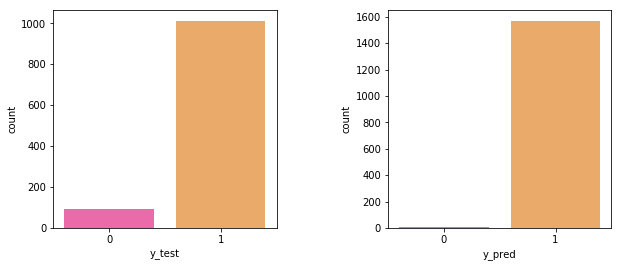

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns
fig=plt.figure(figsize=(10,4))
fig.subplots_adjust(wspace=0.5)
y_List=[y_test,y_pred]
label=['y_test','y_pred']
for i in range(0,len(y_List)):
    ax=fig.add_subplot(1,2,i+1)
    ax=sns.countplot(y_List[i],palette='spring')
    ax.set_xlabel(label[i])
plt.savefig('figAlexaCount.png')
#plt.show()